In [0]:
import os
import numpy as np 
import pandas as pd
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/')
#os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/')
#
os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/training_set/dogs')

#os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/test_set/')


['dog.370.jpg',
 'dog.3704.jpg',
 'dog.3700.jpg',
 'dog.3707.jpg',
 'dog.3705.jpg',
 'dog.37.jpg',
 'dog.3703.jpg',
 'dog.3701.jpg',
 'dog.3706.jpg',
 'dog.3702.jpg',
 'dog.3708.jpg',
 'dog.3709.jpg',
 'dog.3710.jpg',
 'dog.371.jpg',
 'dog.3716.jpg',
 'dog.3712.jpg',
 'dog.3715.jpg',
 'dog.3711.jpg',
 'dog.3713.jpg',
 'dog.3714.jpg',
 'dog.3717.jpg',
 'dog.3718.jpg',
 'dog.3723.jpg',
 'dog.3719.jpg',
 'dog.372.jpg',
 'dog.3720.jpg',
 'dog.3725.jpg',
 'dog.3724.jpg',
 'dog.3722.jpg',
 'dog.3721.jpg',
 'dog.3726.jpg',
 'dog.3727.jpg',
 'dog.3728.jpg',
 'dog.373.jpg',
 'dog.3731.jpg',
 'dog.3729.jpg',
 'dog.3730.jpg',
 'dog.3733.jpg',
 'dog.3732.jpg',
 'dog.3734.jpg',
 'dog.3736.jpg',
 'dog.3735.jpg',
 'dog.3739.jpg',
 'dog.3743.jpg',
 'dog.3737.jpg',
 'dog.3740.jpg',
 'dog.3742.jpg',
 'dog.3738.jpg',
 'dog.3741.jpg',
 'dog.374.jpg',
 'dog.3744.jpg',
 'dog.3745.jpg',
 'dog.3746.jpg',
 'dog.3752.jpg',
 'dog.3750.jpg',
 'dog.3747.jpg',
 'dog.3748.jpg',
 'dog.3751.jpg',
 'dog.375.jpg',
 'dog

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()

classifier.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(64,64,3)))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/training_set/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
test_set = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/test_set/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)



Found 8020 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


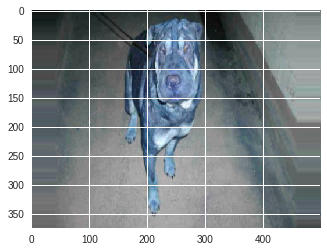

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
dog2=   cv2.imread('/content/gdrive/My Drive/Colab Notebooks/Data_sets/cats_dog/training_set/dogs/dog.4000.jpg')
plt.imshow(train_datagen.random_transform(dog2))

In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [0]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
results = classifier.fit_generator(training_set,epochs=1,
                              steps_per_epoch=1,validation_data=test_set,
                             validation_steps=3
                            
                         )

Epoch 1/1
1/1 [==============================] - 27s 27s/step - loss: 0.6912 - acc: 0.5312 - val_loss: 0.7091 - val_acc: 0.5417


In [0]:
classifier.save('cat_dog2_1_epoch.h5')

In [0]:
results.history['acc']

[0.53125]

In [0]:
  dog21 = cv2.resize(dog2, (64,64))
  
  dog_img = dog21/255

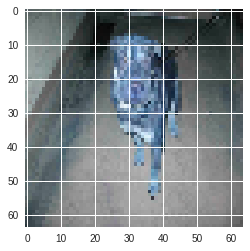

In [0]:
plt.imshow(dog_img)
dog_img1=dog_img.reshape(1,64,64,3)


In [0]:
classifier.predict(dog_img1)

array([[0.52695185]], dtype=float32)

In [0]:
classifier.predict_classes(dog_img1)

array([[1]], dtype=int32)